# Exercise w/ PyTorch
### Author: Ho Kyung Sung

#### Assignment spec: (date: May 22 2019)
(i) Generate a dataset as follows: sample 10000 points from N(0, 1) as inputs (x). Define outputs (y) as y = 5x^3 + 10. Reserve 80% of the dataset for training and save 20% for evaluation.

(ii) train a linear regression model (built in PyTorch!) using gradient descent on the training dataset. Evaluate on the reserved 20%. How does your model perform on training and evaluation data? (compute the mean squared error between predicted y and true y). 

(iii) Add more layers and some nonlinearities to your linear regression model (nn.TanH lets say). Compute training and evaluation performance again. What happens?

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [102]:
# Function for printing evaluation stats
def print_result(x_eval, y_eval, model):
    predicted = model.forward(torch.from_numpy(x_eval).unsqueeze(1)).data.numpy()
    print(predicted.shape)

    y_eval = np.expand_dims(y_eval, 1)
    final_loss = np.mean(np.square(y_eval - predicted))
    final_loss2 = criterion(torch.from_numpy(predicted), torch.from_numpy(y_eval)).data.numpy()
    print(final_loss)
    print(final_loss2)
    
    plt.plot(x_eval, y_eval, 'o', label = 'from data', alpha = 0.5)
    plt.plot(x_eval, predicted, '--', label = 'prediction', alpha = 0.5)
    plt.legend()
    plt.show()
    print(model_ln.state_dict())

>(i) Generate dataset

In [103]:
# (i) Generate dataset
n_data = 10000
training_cutoff = n_data * 4 // 5

mu, sigma = 0, 1
x = (sigma * np.random.randn(n_data) + mu).astype(np.float32)
y = 5*(x**3) + 10

In [104]:
# (ii) Train linear regression model
# Create linear regression model
class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        # Single linear layer
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        predict = self.linear(x)
        return predict

>(ii) Linear Regression

In [105]:
# Create instance of model
in_dim = 1
out_dim = 1
model_ln = LinearRegressionModel(in_dim, out_dim)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_ln.parameters(), lr = l_rate)

In [106]:
x_train = torch.from_numpy(x[:training_cutoff]).unsqueeze(1)
y_train = torch.from_numpy(y[:training_cutoff]).unsqueeze(1)

epochs = 300
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_ln.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # Q: how to stop after plateauing?
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 10 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 522.5524291992188
training epoch 10, loss 404.2661437988281
training epoch 20, loss 325.7874450683594
training epoch 30, loss 273.7192687988281
training epoch 40, loss 239.17347717285156
training epoch 50, loss 216.253173828125
training epoch 60, loss 201.04595947265625
training epoch 70, loss 190.95620727539062
training epoch 80, loss 184.26177978515625
training epoch 90, loss 179.820068359375
training epoch 100, loss 176.87298583984375
training epoch 110, loss 174.91761779785156
training epoch 120, loss 173.62020874023438
training epoch 130, loss 172.7593536376953
training epoch 140, loss 172.18817138671875
training epoch 150, loss 171.80917358398438
training epoch 160, loss 171.55770874023438
training epoch 170, loss 171.39085388183594
training epoch 180, loss 171.28013610839844
training epoch 190, loss 171.20668029785156
training epoch 200, loss 171.15792846679688
training epoch 210, loss 171.12557983398438
training epoch 220, loss 171.1041259765625
training 

(2000, 1)
125.638374
125.63837


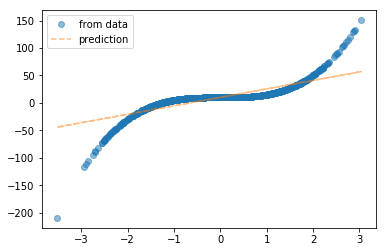

OrderedDict([('linear.weight', tensor([[15.4131]])), ('linear.bias', tensor([10.0581]))])


In [107]:
# Evaluate Linear Model
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_ln)

>(iii) Add non-linear layers (nn.TanH)

In [108]:
# iii) Add non-linear layers (nn.TanH)
# Create neural regression model
class NeuralRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralRegressionModel, self).__init__() 
        # Single linear layer
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)    # hidden layer
        self.tanH = torch.nn.Hardtanh()                         # non-linear layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)   # linear output layer
        

    def forward(self, x):
        x = self.hidden(x)
        x = self.tanH(x)               # activation function for hidden layer
        x = self.linear(x)             # linear output
        return x

In [109]:
# Create instance of model
model_tanH = NeuralRegressionModel(input_dim=1, hidden_dim=100, output_dim=1)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_tanH.parameters(), lr = l_rate)

In [137]:
epochs = 2000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_tanH.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 50 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 9.274558067321777
training epoch 50, loss 9.274558067321777
training epoch 100, loss 9.274558067321777
training epoch 150, loss 9.274558067321777
training epoch 200, loss 9.274558067321777
training epoch 250, loss 9.274558067321777
training epoch 300, loss 9.274558067321777
training epoch 350, loss 9.274558067321777
training epoch 400, loss 9.274558067321777
training epoch 450, loss 9.274558067321777
training epoch 500, loss 9.274558067321777
training epoch 550, loss 9.274558067321777
training epoch 600, loss 9.274558067321777
training epoch 650, loss 9.274558067321777
training epoch 700, loss 9.274558067321777
training epoch 750, loss 9.274558067321777
training epoch 800, loss 9.274558067321777
training epoch 850, loss 9.274558067321777
training epoch 900, loss 9.274558067321777
training epoch 950, loss 9.274558067321777
training epoch 1000, loss 9.274558067321777
training epoch 1050, loss 9.274558067321777
training epoch 1100, loss 9.274558067321777
training ep

(2000, 1)
4.612491
4.6124916


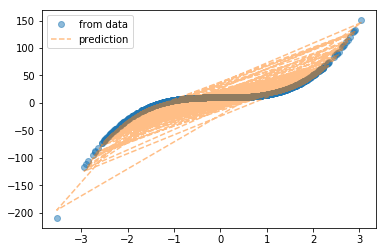

OrderedDict([('linear.weight', tensor([[15.4131]])), ('linear.bias', tensor([10.0581]))])


In [138]:
# Evalutate non-linear neural network on test set
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_tanH)

#### Assignment spec: (date: May 31 2019)
1. To measure overfitting, take your trained model and sample points from N(3, 1) and N(-3, 1). Compare your model’s predictions to the true answer. You should see that the MSE is much higher than within the N(0, 1) range.

2. Add some form of regularization to your model. Retrain and try to do (1) again. You should see much better MSE.

>1. test new dataset out of range

In [132]:
# New dataset
n_new_data = 500

mu, sigma = 3, 1
x_new1 = (sigma * np.random.randn(n_new_data) + mu).astype(np.float32)
y_new1 = 5*(x_new1**3) + 10

mu, sigma = -3, 1
x_new2 = (sigma * np.random.randn(n_new_data) + mu).astype(np.float32)
y_new2 = 5*(x_new2**3) + 10

x_new = np.concatenate((x_new1, x_new2))
y_new = np.concatenate((y_new1, y_new2))

(1000, 1)
15419.326
15419.326


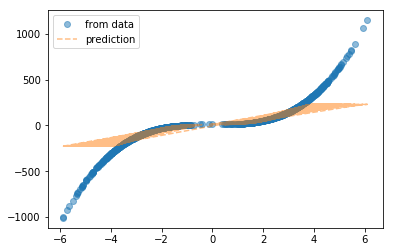

OrderedDict([('linear.weight', tensor([[15.4131]])), ('linear.bias', tensor([10.0581]))])


In [133]:
# Evaluate original model for N(0,1) on unseen dataset
x_eval = x_new
y_eval = y_new
print_result(x_eval, y_eval, model_tanH)

>2. Train model with regularization penalties

In [134]:
# Create neural regression model with regularization penalties
class Neural_Model_Reg(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(Neural_Model_Reg, self).__init__() 
        # Single linear layer
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)    # hidden layer
        self.tanH = torch.nn.Hardtanh()                         # non-linear layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)   # linear output layer
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, x):
        x = self.hidden(x)
        x = self.tanH(x)               # activation function for hidden layer
        x = self.linear(x)             # linear output
        return x

In [135]:
# Create instance of model
model_tanH_reg = Neural_Model_Reg(input_dim=1, hidden_dim=50, output_dim=1)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# ADDED L2 penalty
wt_decay = 0.01

# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_tanH_reg.parameters(), lr = l_rate, momentum = 0, weight_decay = wt_decay)

In [136]:
epochs = 1000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_tanH_reg.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 50 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 515.4203491210938
training epoch 50, loss 131.65582275390625
training epoch 100, loss 83.4230728149414
training epoch 150, loss 61.32931137084961
training epoch 200, loss 49.672706604003906
training epoch 250, loss 42.73807907104492
training epoch 300, loss 38.11326599121094
training epoch 350, loss 34.63797378540039
training epoch 400, loss 30.7462158203125
training epoch 450, loss 36.12220764160156
training epoch 500, loss 29.67843246459961
training epoch 550, loss 29.39940643310547
training epoch 600, loss 29.014053344726562
training epoch 650, loss 29.282915115356445
training epoch 700, loss 28.079124450683594
training epoch 750, loss 26.555757522583008
training epoch 800, loss 25.44676971435547
training epoch 850, loss 25.051692962646484
training epoch 900, loss 24.350753784179688
training epoch 950, loss 24.386703491210938


(2000, 1)
10.360137
10.360137


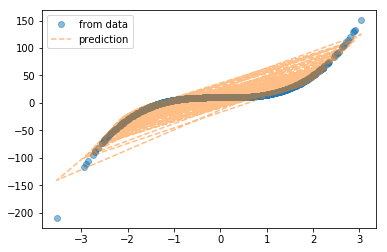

OrderedDict([('linear.weight', tensor([[15.4131]])), ('linear.bias', tensor([10.0581]))])


In [127]:
# Evalutate non-linear neural network on test set
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_tanH_reg)

(20000, 1)
23012.297
23012.299


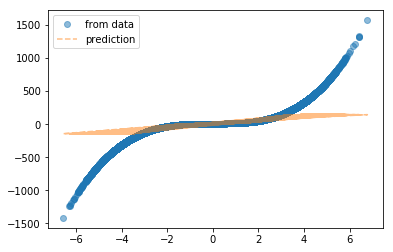

OrderedDict([('linear.weight', tensor([[15.4131]])), ('linear.bias', tensor([10.0581]))])


In [128]:
# Evaluate new regularized model for N(0,1) on unseen dataset
x_eval = x_new
y_eval = y_new
print_result(x_eval, y_eval, model_tanH_reg)

### Questions:
* Regularization doesn't seem to help generalization?
* Way to stop after plateuing to a degree?
* Unsure what the prediction plot is showing -- why are there multiple lines, instead of a curve?